# Titanic - Machine Learning from Disaster

## Code:

### Importing Libraries

In [1]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import fetch_openml

# perfromance metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


### Data Preprocessing

In [2]:
# importing the train dataset and test dataset
train_dataset = pd.read_csv('./train.csv')
test_dataset = pd.read_csv('./test.csv')

In [3]:
# checking the first 5 rows of the train dataset
print(train_dataset.head().to_markdown())

|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|---:|--------------:|-----------:|---------:|:----------------------------------------------------|:-------|------:|--------:|--------:|:-----------------|--------:|:--------|:-----------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Heikkinen, Miss. Laina                              | female |    26 |       0 |       0 | STON/O2. 3101282 |  7.925  | nan     | S          |
|  3 |             4 |          1 |        1 | Fut

In [4]:
# checking the first 5 rows of the test dataset
print(test_dataset.head().to_markdown())

|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare |   Cabin | Embarked   |
|---:|--------------:|---------:|:---------------------------------------------|:-------|------:|--------:|--------:|---------:|--------:|--------:|:-----------|
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 |     nan | Q          |
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   363272 |  7      |     nan | S          |
|  2 |           894 |        2 | Myles, Mr. Thomas Francis                    | male   |  62   |       0 |       0 |   240276 |  9.6875 |     nan | Q          |
|  3 |           895 |        3 | Wirz, Mr. Albert                             | male   |  27   |       0 |       0 |   315154 |  8.6625 |     nan | S          |
|  4 |           896 |      

In [5]:
# collecting information about the train dataset
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# collecting information about the test dataset
print(test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [7]:
# describing the train dataset
print(train_dataset.describe().to_markdown())

|       |   PassengerId |   Survived |     Pclass |      Age |      SibSp |      Parch |     Fare |
|:------|--------------:|-----------:|-----------:|---------:|-----------:|-----------:|---------:|
| count |       891     | 891        | 891        | 714      | 891        | 891        | 891      |
| mean  |       446     |   0.383838 |   2.30864  |  29.6991 |   0.523008 |   0.381594 |  32.2042 |
| std   |       257.354 |   0.486592 |   0.836071 |  14.5265 |   1.10274  |   0.806057 |  49.6934 |
| min   |         1     |   0        |   1        |   0.42   |   0        |   0        |   0      |
| 25%   |       223.5   |   0        |   2        |  20.125  |   0        |   0        |   7.9104 |
| 50%   |       446     |   0        |   3        |  28      |   0        |   0        |  14.4542 |
| 75%   |       668.5   |   1        |   3        |  38      |   1        |   0        |  31      |
| max   |       891     |   1        |   3        |  80      |   8        |   6        | 512.329  |


In [8]:
# describing the test dataset
print(test_dataset.describe().to_markdown())

|       |   PassengerId |     Pclass |      Age |      SibSp |      Parch |     Fare |
|:------|--------------:|-----------:|---------:|-----------:|-----------:|---------:|
| count |        418    | 418        | 332      | 418        | 418        | 417      |
| mean  |       1100.5  |   2.26555  |  30.2726 |   0.447368 |   0.392344 |  35.6272 |
| std   |        120.81 |   0.841838 |  14.1812 |   0.89676  |   0.981429 |  55.9076 |
| min   |        892    |   1        |   0.17   |   0        |   0        |   0      |
| 25%   |        996.25 |   1        |  21      |   0        |   0        |   7.8958 |
| 50%   |       1100.5  |   3        |  27      |   0        |   0        |  14.4542 |
| 75%   |       1204.75 |   3        |  39      |   1        |   0        |  31.5    |
| max   |       1309    |   3        |  76      |   8        |   9        | 512.329  |


In [9]:
# checking the shape of the train dataset
print("Shape of the train dataset is: ", train_dataset.shape)

Shape of the train dataset is:  (891, 12)


In [10]:
# checking the shape of the test dataset
print("Shape of the test dataset is: ", test_dataset.shape)

Shape of the test dataset is:  (418, 11)


In [11]:
# print the number of unique values in each column of train dataset
print(train_dataset.nunique())


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [12]:
# print the number of unique values in each column of test dataset
print(test_dataset.nunique())

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [13]:
# dropping the columns which are not required in the train dataset
train_dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [14]:
# dropping the columns which are not required in the test dataset
test_dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [15]:
# checking for null values in the train dataset
print(train_dataset.isnull().sum().to_markdown())

|          |   0 |
|:---------|----:|
| Survived |   0 |
| Pclass   |   0 |
| Sex      |   0 |
| Age      | 177 |
| SibSp    |   0 |
| Parch    |   0 |
| Fare     |   0 |
| Cabin    | 687 |
| Embarked |   2 |


In [16]:
# treating null values in the train dataset
train_dataset['Age'].fillna(train_dataset['Age'].mean(), inplace=True)
train_dataset['Cabin'].fillna(train_dataset['Cabin'].mode()[0], inplace=True)
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0], inplace=True)

In [17]:
# checking for null values in the train dataset
print(train_dataset.isnull().sum().to_markdown())

|          |   0 |
|:---------|----:|
| Survived |   0 |
| Pclass   |   0 |
| Sex      |   0 |
| Age      |   0 |
| SibSp    |   0 |
| Parch    |   0 |
| Fare     |   0 |
| Cabin    |   0 |
| Embarked |   0 |


In [18]:
# checking for null values in the test dataset
print(test_dataset.isnull().sum().to_markdown())

|          |   0 |
|:---------|----:|
| Pclass   |   0 |
| Sex      |   0 |
| Age      |  86 |
| SibSp    |   0 |
| Parch    |   0 |
| Fare     |   1 |
| Cabin    | 327 |
| Embarked |   0 |


In [19]:
# treating null values in the test dataset
test_dataset['Age'].fillna(test_dataset['Age'].mean(), inplace=True)

In [20]:
# checking for null values in the test dataset
print(test_dataset.isnull().sum().to_markdown())

|          |   0 |
|:---------|----:|
| Pclass   |   0 |
| Sex      |   0 |
| Age      |   0 |
| SibSp    |   0 |
| Parch    |   0 |
| Fare     |   1 |
| Cabin    | 327 |
| Embarked |   0 |


In [21]:
# checking the first 5 rows of the train dataset
print(train_dataset.head().to_markdown())

|    |   Survived |   Pclass | Sex    |   Age |   SibSp |   Parch |    Fare | Cabin   | Embarked   |
|---:|-----------:|---------:|:-------|------:|--------:|--------:|--------:|:--------|:-----------|
|  0 |          0 |        3 | male   |    22 |       1 |       0 |  7.25   | B96 B98 | S          |
|  1 |          1 |        1 | female |    38 |       1 |       0 | 71.2833 | C85     | C          |
|  2 |          1 |        3 | female |    26 |       0 |       0 |  7.925  | B96 B98 | S          |
|  3 |          1 |        1 | female |    35 |       1 |       0 | 53.1    | C123    | S          |
|  4 |          0 |        3 | male   |    35 |       0 |       0 |  8.05   | B96 B98 | S          |


In [22]:
# checking the first 5 rows of the test dataset
print(test_dataset.head().to_markdown())

|    |   Pclass | Sex    |   Age |   SibSp |   Parch |    Fare |   Cabin | Embarked   |
|---:|---------:|:-------|------:|--------:|--------:|--------:|--------:|:-----------|
|  0 |        3 | male   |  34.5 |       0 |       0 |  7.8292 |     nan | Q          |
|  1 |        3 | female |  47   |       1 |       0 |  7      |     nan | S          |
|  2 |        2 | male   |  62   |       0 |       0 |  9.6875 |     nan | Q          |
|  3 |        3 | male   |  27   |       0 |       0 |  8.6625 |     nan | S          |
|  4 |        3 | female |  22   |       1 |       1 | 12.2875 |     nan | S          |


In [23]:
labelencoder = LabelEncoder()

# converting categorical values to numerical values using label encoder in the train dataset
train_dataset['Sex'] = labelencoder.fit_transform(train_dataset['Sex'])
train_dataset['Cabin'] = labelencoder.fit_transform(train_dataset['Cabin'])
train_dataset['Embarked'] = labelencoder.fit_transform(
    train_dataset['Embarked'])

# converting categorical values to numerical values using label encoder in the test dataset
test_dataset['Sex'] = labelencoder.fit_transform(test_dataset['Sex'])
test_dataset['Cabin'] = labelencoder.fit_transform(test_dataset['Cabin'])
test_dataset['Embarked'] = labelencoder.fit_transform(test_dataset['Embarked'])

In [24]:
# checking the first 5 rows of the train dataset
print(train_dataset.head().to_markdown())

|    |   Survived |   Pclass |   Sex |   Age |   SibSp |   Parch |    Fare |   Cabin |   Embarked |
|---:|-----------:|---------:|------:|------:|--------:|--------:|--------:|--------:|-----------:|
|  0 |          0 |        3 |     1 |    22 |       1 |       0 |  7.25   |      47 |          2 |
|  1 |          1 |        1 |     0 |    38 |       1 |       0 | 71.2833 |      81 |          0 |
|  2 |          1 |        3 |     0 |    26 |       0 |       0 |  7.925  |      47 |          2 |
|  3 |          1 |        1 |     0 |    35 |       1 |       0 | 53.1    |      55 |          2 |
|  4 |          0 |        3 |     1 |    35 |       0 |       0 |  8.05   |      47 |          2 |


In [25]:
# making the number of survived and not survived passengers equal in the train dataset
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)
train_dataset = train_dataset.sort_values(by=['Survived'])
train_dataset = train_dataset.iloc[0:342, :]
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)

In [26]:
# defining the dependent and independent variables in the train dataset
X = train_dataset.drop(['Survived'], axis=1)
y = train_dataset['Survived']

In [27]:
# splitting the train dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and Evaluating the Model

#### KNN Algorithm

In [28]:
# training the classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [29]:
# testing the model
predicted_y_test = knn_clf.predict(X_test)


In [30]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predicted_y_test))

# accuracy of the model
accuracy = accuracy_score(y_test, predicted_y_test)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, predicted_y_test, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, predicted_y_test, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, predicted_y_test, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, predicted_y_test))


Confusion Matrix: 
[[69]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

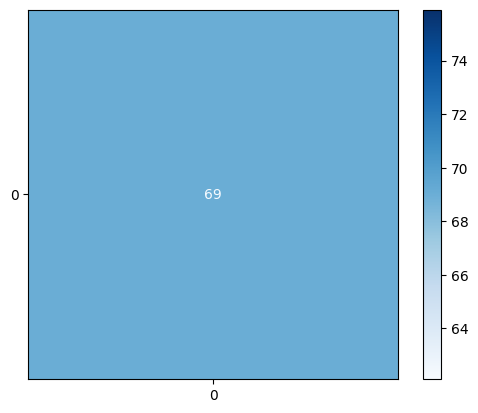

In [32]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predicted_y_test), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

#### SVM Algorithm

In [ ]:
# training the classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [ ]:
# testing the model
predicted_y_test = knn_clf.predict(X_test)


In [ ]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predicted_y_test))

# accuracy of the model
accuracy = accuracy_score(y_test, predicted_y_test)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, predicted_y_test, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, predicted_y_test, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, predicted_y_test, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, predicted_y_test))


Confusion Matrix: 
[[85 20]
 [31 43]]
Accuracy:  0.7150837988826816
Precision:  0.7076491516146688
Recall:  0.6953024453024452
F1 Score:  0.6984839977540709

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.63        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



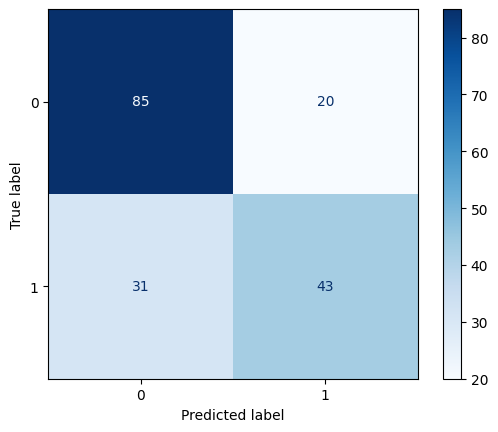

In [ ]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predicted_y_test), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)


#### Logistic Regression Algorithm

In [ ]:
# training the classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# testing the model
predicted_test_labels = svm_clf.predict(X_test)


In [ ]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predicted_y_test))

# accuracy of the model
accuracy = accuracy_score(y_test, predicted_y_test)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, predicted_y_test, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, predicted_y_test, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, predicted_y_test, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, predicted_y_test))


Confusion Matrix: 
[[85 20]
 [31 43]]
Accuracy:  0.7150837988826816
Precision:  0.7076491516146688
Recall:  0.6953024453024452
F1 Score:  0.6984839977540709

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.63        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



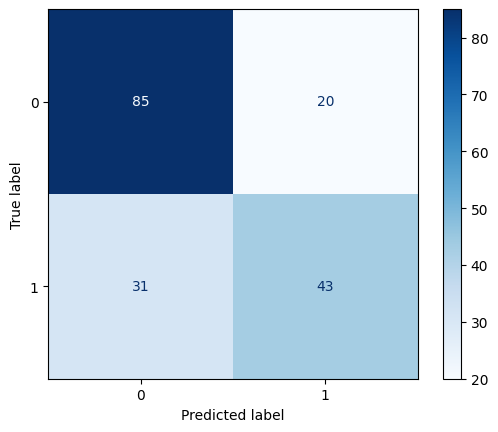

In [ ]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predicted_y_test), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)


#### Naive Bayes Algorithm

In [ ]:
# training the classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)


GaussianNB()

In [ ]:
# testing the model
predicted_y_test = nb_clf.predict(X_test)


In [ ]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predicted_y_test))

# accuracy of the model
accuracy = accuracy_score(y_test, predicted_y_test)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, predicted_y_test, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, predicted_y_test, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, predicted_y_test, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, predicted_y_test))


Confusion Matrix: 
[[85 20]
 [15 59]]
Accuracy:  0.8044692737430168
Precision:  0.7984177215189874
Recall:  0.8034105534105533
F1 Score:  0.8002550613741432

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       105
           1       0.75      0.80      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



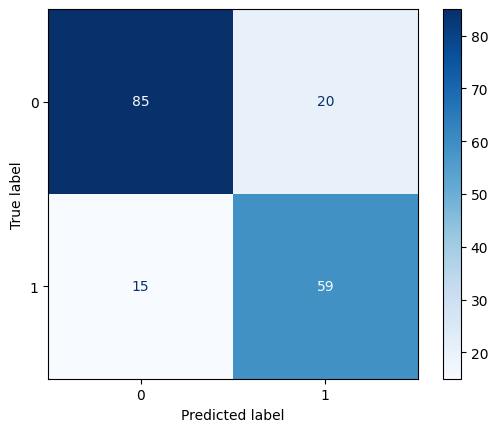

In [ ]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predicted_y_test), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)


#### Random Forest Algorithm

In [ ]:
# training the classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [ ]:
# testing the model
predicted_test_lables = svm_clf.predict(X_test)


In [ ]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predicted_y_test))

# accuracy of the model
accuracy = accuracy_score(y_test, predicted_y_test)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, predicted_y_test, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, predicted_y_test, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, predicted_y_test, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, predicted_y_test))


Confusion Matrix: 
[[85 20]
 [15 59]]
Accuracy:  0.8044692737430168
Precision:  0.7984177215189874
Recall:  0.8034105534105533
F1 Score:  0.8002550613741432

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       105
           1       0.75      0.80      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



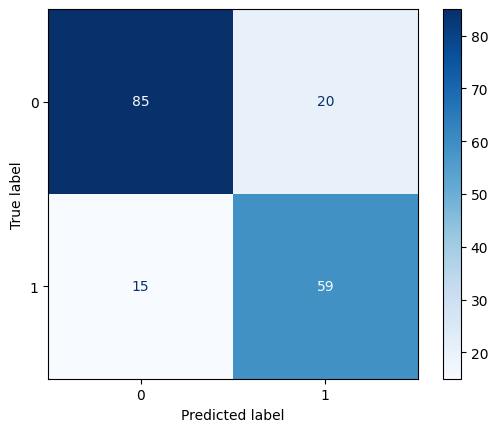

In [ ]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predicted_y_test), display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)


## Predicting the Test Set Results and Creating the Submission File Using the Best Model

In [ ]:
# loading the test dataset
test_dataset = pd.read_csv('test.csv')

# checking the first 5 rows of the test dataset
print(test_dataset.head().to_markdown())

# checking the shape of the test dataset
print("Shape of the test dataset is: ", test_dataset.shape)

# dropping the columns which are not required in the test dataset
test_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'], axis=1, inplace=True)

# converting categorical values to numerical values using label encoder in the test dataset
labelencoder = LabelEncoder()
test_dataset['Sex'] = labelencoder.fit_transform(test_dataset["Sex"])

|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare |   Cabin | Embarked   |
|---:|--------------:|---------:|:---------------------------------------------|:-------|------:|--------:|--------:|---------:|--------:|--------:|:-----------|
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 |     nan | Q          |
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   363272 |  7      |     nan | S          |
|  2 |           894 |        2 | Myles, Mr. Thomas Francis                    | male   |  62   |       0 |       0 |   240276 |  9.6875 |     nan | Q          |
|  3 |           895 |        3 | Wirz, Mr. Albert                             | male   |  27   |       0 |       0 |   315154 |  8.6625 |     nan | S          |
|  4 |           896 |      

In [ ]:
# using the SVM classifier to predict the labels of the test data
predicted_test_labels = svm_clf.predict(X_test)

In [ ]:
# creating a dataframe to store the predicted labels
predicted_test_labels = pd.DataFrame(predicted_test_labels)

# adding the image id column to the dataframe
predicted_test_labels['ImageId'] = range(1, len(predicted_test_labels) + 1)

# renaming the columns of the dataframe
predicted_test_labels.columns = ['Label', 'ImageId']

# rearranging the columns of the dataframe
predicted_test_labels = predicted_test_labels[['ImageId', 'Label']]

# saving the dataframe as a csv file
predicted_test_labels.to_csv('predicted_test_labels.csv', index=False)
